In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [39]:
df = pd.read_csv("d612874c2dbb.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [41]:
df. columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [42]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

C:\Users\faisa\AppData\Local\Temp\ipykernel_14560\2240882981.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Salary)


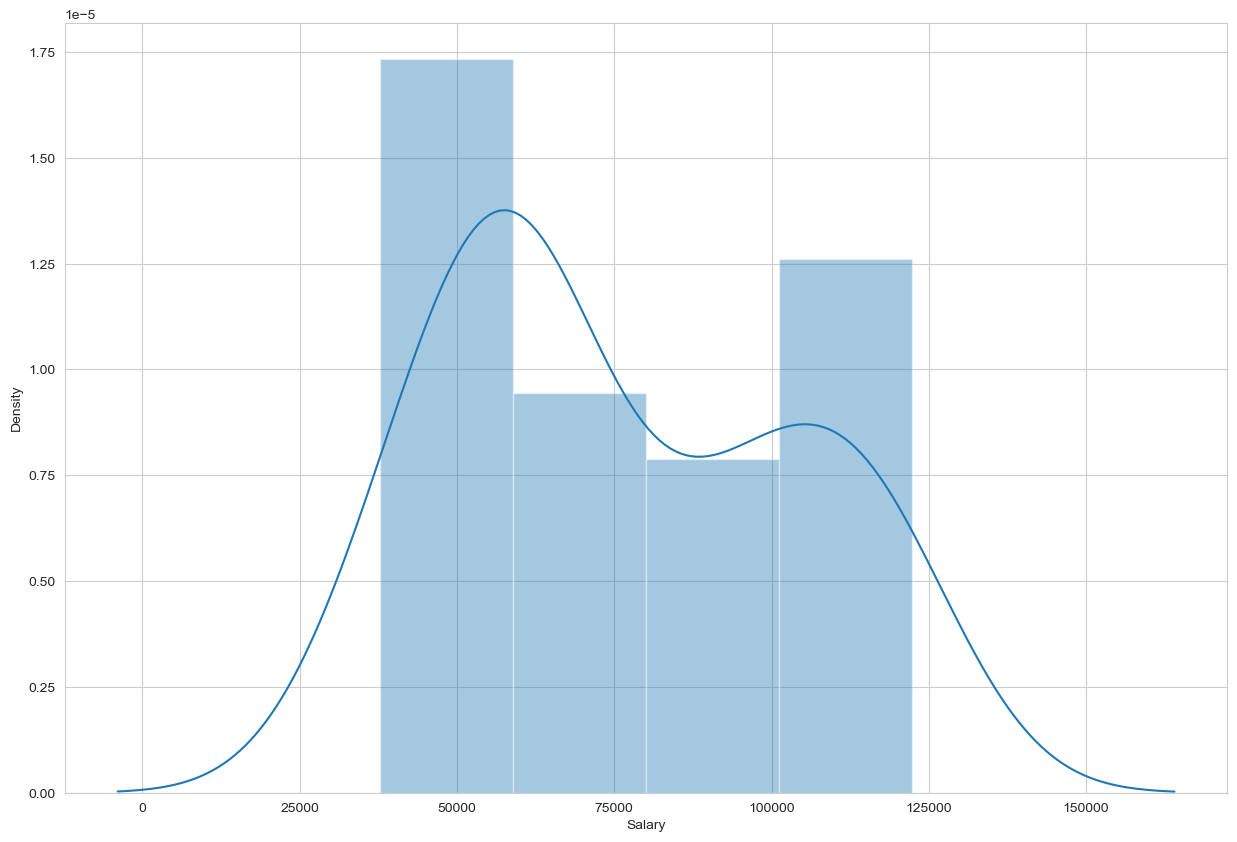

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.Salary)
plt.show()

In [44]:
x = df.drop(columns=["Salary"])
y = df["YearsExperience"]
x.shape

(30, 1)

In [45]:
y.shape

(30,)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
training_score = []
testing_score = []

In [48]:
from sklearn.metrics import r2_score

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_score of {model} model on Training Data is:",a)
    print(f"r2_score of {model} model on Testing Data is:",b)

In [49]:
from sklearn.linear_model import LinearRegression

model_prediction(LinearRegression())

r2_score of LinearRegression() model on Training Data is: 100.0
r2_score of LinearRegression() model on Testing Data is: 100.0


In [50]:
from sklearn.ensemble import RandomForestRegressor
model_prediction(RandomForestRegressor())

r2_score of RandomForestRegressor() model on Training Data is: 99.92248461234401
r2_score of RandomForestRegressor() model on Testing Data is: 99.59396001439072


In [51]:
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor(verbose=False))

r2_score of <catboost.core.CatBoostRegressor object at 0x0000021888A5EE00> model on Training Data is: 99.98691971576953
r2_score of <catboost.core.CatBoostRegressor object at 0x0000021888A5EE00> model on Testing Data is: 99.33802039150098


In [55]:
models = ['Linear Regerssion', 'Random Forest', 'Catboost']

In [56]:
import pandas as pd
df1 = pd.DataFrame({'Algorithms':models,
                    'Training Score':training_score, 
                    'Testing Score':testing_score})
df1

,Algorithms,Training Score,Testing Score
0,Linear Regerssion,100.000000,100.00000
1,Random Forest,99.922485,99.59396
2,Catboost,99.986920,99.33802


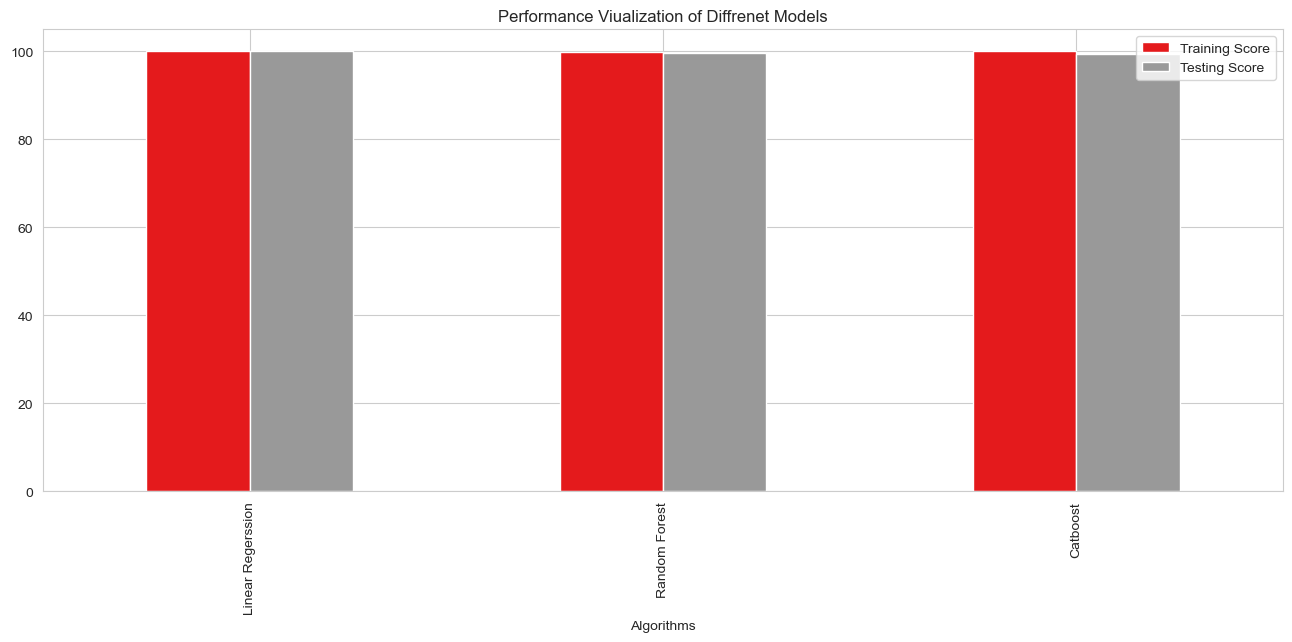

In [59]:
df1.plot(x="Algorithms",y=["Training Score", "Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Viualization of Diffrenet Models", colormap="Set1")
plt.show()